# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import gym
import random
import torch
#import numpy as np
#from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

C:\Users\z0026h4e\AppData\Local\Continuum\miniconda3\envs\drlnd1\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


	Steps:  14
Episode 1	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 2	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 3	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 4	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 5	Average Score: 0.00	Score: 0.000	Steps:  17
Episode 6	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 7	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 8	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 9	Average Score: 0.00	Score: 0.000	Steps:  14
Episode 10	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 11	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 12	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 13	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 14	Average Score: 0.00	Score: 0.000	Steps:  14
Episode 15	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 16	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 17	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 18	Average Score: 0.00	Score: 0.000	Steps:  13
Episode

Episode 149	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 150	Average Score: 0.01	Score: 0.000
	Steps:  13
Episode 151	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 152	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 153	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 154	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 155	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 156	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 157	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 158	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 159	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 160	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 161	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 162	Average Score: 0.01	Score: 0.000	Steps:  33
Episode 163	Average Score: 0.01	Score: 0.100	Steps:  13
Episode 164	Average Score: 0.01	Score: 0.000	Steps:  32
Episode 165	Average Score: 0.01	Score: 0.100	Steps:  14
Episode 166	Average Score: 0.01	Score: 0.000	St

Episode 295	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 296	Average Score: 0.01	Score: 0.000	Steps:  31
Episode 297	Average Score: 0.01	Score: 0.100	Steps:  14
Episode 298	Average Score: 0.01	Score: 0.000	Steps:  29
Episode 299	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 300	Average Score: 0.01	Score: 0.000
	Steps:  13
Episode 301	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 302	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 303	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 304	Average Score: 0.01	Score: 0.000	Steps:  32
Episode 305	Average Score: 0.01	Score: 0.100	Steps:  13
Episode 306	Average Score: 0.01	Score: 0.000	Steps:  36
Episode 307	Average Score: 0.01	Score: 0.100	Steps:  13
Episode 308	Average Score: 0.01	Score: 0.000	Steps:  31
Episode 309	Average Score: 0.01	Score: 0.100	Steps:  13
Episode 310	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 311	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 312	Average Score: 0.01	Score: 0.000	St

Episode 441	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 442	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 443	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 444	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 445	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 446	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 447	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 448	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 449	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 450	Average Score: 0.01	Score: 0.000
	Steps:  13
Episode 451	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 452	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 453	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 454	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 455	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 456	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 457	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 458	Average Score: 0.01	Score: 0.000	St

Episode 587	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 588	Average Score: 0.00	Score: 0.000	Steps:  32
Episode 589	Average Score: 0.00	Score: 0.100	Steps:  13
Episode 590	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 591	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 592	Average Score: 0.00	Score: 0.000	Steps:  14
Episode 593	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 594	Average Score: 0.00	Score: 0.000	Steps:  32
Episode 595	Average Score: 0.00	Score: 0.090	Steps:  13
Episode 596	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 597	Average Score: 0.00	Score: 0.000	Steps:  14
Episode 598	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 599	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 600	Average Score: 0.00	Score: 0.000
	Steps:  13
Episode 601	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 602	Average Score: 0.00	Score: 0.000	Steps:  14
Episode 603	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 604	Average Score: 0.00	Score: 0.000	St

Episode 733	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 734	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 735	Average Score: 0.01	Score: 0.000	Steps:  14
Episode 736	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 737	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 738	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 739	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 740	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 741	Average Score: 0.01	Score: 0.000	Steps:  29
Episode 742	Average Score: 0.01	Score: 0.090	Steps:  14
Episode 743	Average Score: 0.01	Score: 0.000	Steps:  29
Episode 744	Average Score: 0.01	Score: 0.090	Steps:  14
Episode 745	Average Score: 0.01	Score: 0.000	Steps:  28
Episode 746	Average Score: 0.01	Score: 0.100	Steps:  31
Episode 747	Average Score: 0.01	Score: 0.100	Steps:  28
Episode 748	Average Score: 0.02	Score: 0.100	Steps:  30
Episode 749	Average Score: 0.02	Score: 0.090	Steps:  34
Episode 750	Average Score: 0.02	Score: 0.100
	St

Episode 879	Average Score: 0.00	Score: 0.000	Steps:  14
Episode 880	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 881	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 882	Average Score: 0.00	Score: 0.000	Steps:  32
Episode 883	Average Score: 0.00	Score: 0.100	Steps:  13
Episode 884	Average Score: 0.00	Score: 0.000	Steps:  13
Episode 885	Average Score: 0.00	Score: 0.000	Steps:  14
Episode 886	Average Score: 0.00	Score: 0.000	Steps:  15
Episode 887	Average Score: 0.00	Score: 0.000	Steps:  29
Episode 888	Average Score: 0.00	Score: 0.090	Steps:  29
Episode 889	Average Score: 0.00	Score: 0.090	Steps:  13
Episode 890	Average Score: 0.00	Score: 0.000	Steps:  31
Episode 891	Average Score: 0.01	Score: 0.100	Steps:  13
Episode 892	Average Score: 0.01	Score: 0.000	Steps:  30
Episode 893	Average Score: 0.01	Score: 0.090	Steps:  13
Episode 894	Average Score: 0.01	Score: 0.000	Steps:  13
Episode 895	Average Score: 0.01	Score: 0.000	Steps:  29
Episode 896	Average Score: 0.01	Score: 0.100	Ste

Episode 1024	Average Score: 0.04	Score: 0.090	Steps:  14
Episode 1025	Average Score: 0.04	Score: 0.000
	Steps:  29
Episode 1026	Average Score: 0.04	Score: 0.100	Steps:  30
Episode 1027	Average Score: 0.04	Score: 0.100	Steps:  63
Episode 1028	Average Score: 0.04	Score: 0.100	Steps:  48
Episode 1029	Average Score: 0.04	Score: 0.100	Steps:  64
Episode 1030	Average Score: 0.04	Score: 0.200	Steps:  30
Episode 1031	Average Score: 0.05	Score: 0.100	Steps:  29
Episode 1032	Average Score: 0.05	Score: 0.090	Steps:  29
Episode 1033	Average Score: 0.05	Score: 0.090	Steps:  64
Episode 1034	Average Score: 0.05	Score: 0.100	Steps:  29
Episode 1035	Average Score: 0.05	Score: 0.100	Steps:  88
Episode 1036	Average Score: 0.05	Score: 0.290	Steps:  30
Episode 1037	Average Score: 0.05	Score: 0.090	Steps:  29
Episode 1038	Average Score: 0.05	Score: 0.100	Steps:  201
Episode 1039	Average Score: 0.05	Score: 0.500	Steps:  65
Episode 1040	Average Score: 0.06	Score: 0.190	Steps:  28
Episode 1041	Average Score: 0

Episode 1167	Average Score: 0.11	Score: 0.100	Steps:  62
Episode 1168	Average Score: 0.11	Score: 0.100	Steps:  49
Episode 1169	Average Score: 0.11	Score: 0.100	Steps:  201
Episode 1170	Average Score: 0.11	Score: 0.500	Steps:  138
Episode 1171	Average Score: 0.11	Score: 0.300	Steps:  30
Episode 1172	Average Score: 0.11	Score: 0.100	Steps:  51
Episode 1173	Average Score: 0.11	Score: 0.100	Steps:  69
Episode 1174	Average Score: 0.12	Score: 0.200	Steps:  87
Episode 1175	Average Score: 0.12	Score: 0.200
	Steps:  18
Episode 1176	Average Score: 0.12	Score: 0.100	Steps:  80
Episode 1177	Average Score: 0.12	Score: 0.200	Steps:  228
Episode 1178	Average Score: 0.12	Score: 0.500	Steps:  36
Episode 1179	Average Score: 0.12	Score: 0.100	Steps:  49
Episode 1180	Average Score: 0.12	Score: 0.100	Steps:  48
Episode 1181	Average Score: 0.12	Score: 0.100	Steps:  13
Episode 1182	Average Score: 0.12	Score: 0.000	Steps:  65
Episode 1183	Average Score: 0.12	Score: 0.100	Steps:  65
Episode 1184	Average Score:

Episode 1310	Average Score: 0.25	Score: 0.200	Steps:  13
Episode 1311	Average Score: 0.25	Score: 0.000	Steps:  202
Episode 1312	Average Score: 0.25	Score: 0.500	Steps:  204
Episode 1313	Average Score: 0.26	Score: 0.500	Steps:  227
Episode 1314	Average Score: 0.26	Score: 0.600	Steps:  536
Episode 1315	Average Score: 0.28	Score: 1.300	Steps:  13
Episode 1316	Average Score: 0.27	Score: 0.000	Steps:  126
Episode 1317	Average Score: 0.28	Score: 0.300	Steps:  146
Episode 1318	Average Score: 0.28	Score: 0.400	Steps:  13
Episode 1319	Average Score: 0.28	Score: 0.000	Steps:  49
Episode 1320	Average Score: 0.28	Score: 0.100	Steps:  355
Episode 1321	Average Score: 0.28	Score: 0.900	Steps:  108
Episode 1322	Average Score: 0.28	Score: 0.300	Steps:  427
Episode 1323	Average Score: 0.29	Score: 1.100	Steps:  450
Episode 1324	Average Score: 0.30	Score: 1.200	Steps:  109
Episode 1325	Average Score: 0.30	Score: 0.300
	Steps:  504
Episode 1326	Average Score: 0.32	Score: 1.300	Steps:  221
Episode 1327	Aver

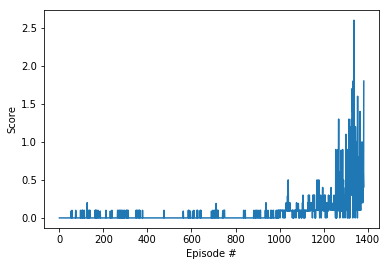

In [5]:
from ddpg_agent import Agents
from collections import deque
#import datetime

agents = Agents(state_size=state_size, 
                action_size=action_size, 
                num_agents=num_agents, 
                random_seed=0)


def ddpg(n_episodes=4000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agents.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action = agents.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agents.step(state, action, rewards, next_state, dones)
            state = next_state
            score += rewards
            if np.any(dones):
                print('\tSteps: ', t)
                break 
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.3f}'.format(i_episode, 
                                                                          np.mean(scores_deque), 
                                                                          np.max(score)), end="")
        average_score = np.mean(scores_deque)
        if i_episode % 25 == 0 or average_score > 0.5:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score))
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth') 
            if average_score > 0.5:
                break
    return scores

scores = ddpg()
#print(scores)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```